In [1]:
#https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296
import numpy as np
import matplotlib.pyplot as plt
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [15]:
# Define parameters
t_max = 100
dt = .1
t1 = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results1 = base_seir_model(init_vals, params, t1)

(0, 100)

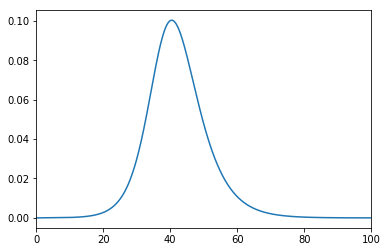

In [25]:
plt.plot(t1,results1[:,2])
plt.xlim(0,100)

In [4]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [17]:
# Define parameters
t_max = 500
dt = .1
t2 = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho=.5
params = alpha, beta, gamma,rho
# Run simulation
results2 = seir_model_with_soc_dist(init_vals, params, t2)

(0, 500)

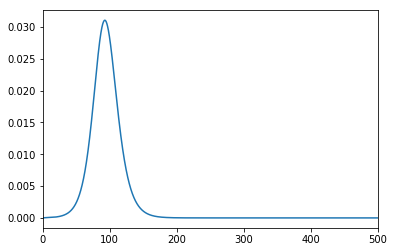

In [19]:
plt.plot(t2,results2[:,2])
plt.xlim(0,500)

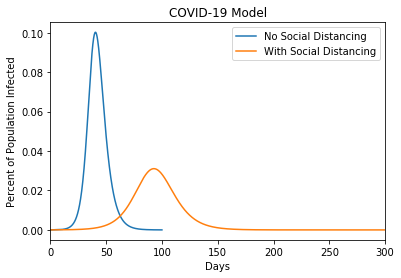

In [23]:
#plotting no distancing and distancing on the same figure to compare the two
plt.plot(t1,results1[:,2],label="No Social Distancing")
plt.plot(t2,results2[:,2],label="With Social Distancing")
plt.legend()
plt.ylabel("Percent of Population Infected")
plt.xlabel("Days")
plt.title("COVID-19 Model")
plt.xlim(0,300)
plt.show()

(0, 500)

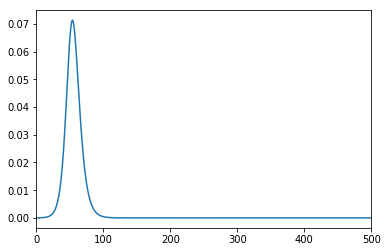

In [26]:
#changing rho to reflect that people might stay inside more during colder seasons
#and outside more during warmer seasons
# Define parameters
t_max = 500
dt = .1
t2 = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho=.75 #three quarters of population are not quarentined. 
params = alpha, beta, gamma,rho
# Run simulation
results3 = seir_model_with_soc_dist(init_vals, params, t2)
plt.plot(t2,results3[:,2])
plt.xlim(0,500)

(0, 500)

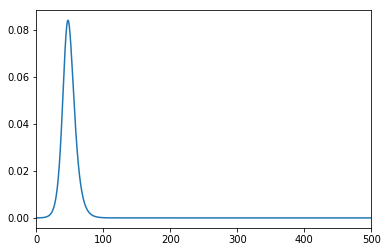

In [39]:
#changing rho to reflect that people might stay inside more during colder seasons
#and outside more during warmer seasons
# Define parameters
t_max = 500
dt = .1
t2 = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho=0.85 #three quarters of population are not quarentined. 
params = alpha, beta, gamma,rho
# Run simulation
results4 = seir_model_with_soc_dist(init_vals, params, t2)
plt.plot(t2,results4[:,2])
plt.xlim(0,500)

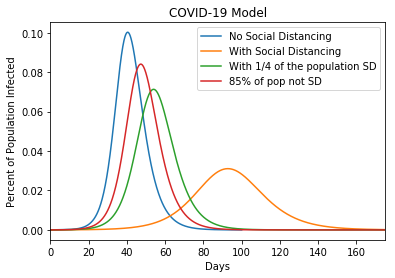

In [43]:
#plotting no distancing and distancing on the same figure to compare the two
plt.plot(t1,results1[:,2],label="No Social Distancing")
plt.plot(t2,results2[:,2],label="With Social Distancing")
plt.plot(t2,results3[:,2],label="With 1/4 of the population SD")
plt.plot(t2,results4[:,2],label="85% of pop not SD")
plt.legend()
plt.ylabel("Percent of Population Infected")
plt.xlabel("Days")
plt.title("COVID-19 Model")
plt.xlim(0,175)
plt.show()